# Use case 2 :-Edit by wael atalla 1 

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import nltk.classify.util
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.classify import NaiveBayesClassifier
import numpy as np
import re
import string
import nltk
import os
%matplotlib inline

In [5]:
path = os.path.join('f:' + os.sep, 'Amazon', 'use case 2', 'Use Case 2', 'Use Case 2', 'dataset', '1429_1.csv')
df3 = pd.read_csv(path)
df3.head()

,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,...,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username
0,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,This product so far has not disappointed. My c...,Kindle,NaN,NaN,Adapter
1,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,great for beginner or experienced person. Boug...,very fast,NaN,NaN,truman
2,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,NaN,NaN,DaveZ
3,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,4.0,http://reviews.bestbuy.com/3545/5620406/review...,I've had my Fire HD 8 two weeks now and I love...,Good!!!,NaN,NaN,Shacks
4,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-12T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,I bought this for my grand daughter when she c...,Fantastic Tablet for kids,NaN,NaN,explore42


In [8]:
df3.columns

Index(['id', 'name', 'asins', 'brand', 'categories', 'keys', 'manufacturer',
       'reviews.date', 'reviews.dateAdded', 'reviews.dateSeen',
       'reviews.didPurchase', 'reviews.doRecommend', 'reviews.id',
       'reviews.numHelpful', 'reviews.rating', 'reviews.sourceURLs',
       'reviews.text', 'reviews.title', 'reviews.userCity',
       'reviews.userProvince', 'reviews.username'],
      dtype='object')

In [12]:
from IPython.display import HTML
cat_hist = df3.groupby('categories',as_index=False).count()
HTML(pd.DataFrame(cat_hist['categories']).to_html())

,categories
0,"Amazon Device Accessories,Kindle Store,Kindle Touch (4th Generation) Accessories,Kindle E-Reader Accessories,Covers,Kindle Touch (4th Generation) Covers"
1,"Amazon Devices & Accessories,Amazon Device Accessories,Power Adapters & Cables,Kindle Store,Kindle E-Reader Accessories,Kindle Paperwhite Accessories"
2,"Back To College,College Electronics,College Tvs & Home Theater,Electronics,Tvs & Home Theater,Streaming Devices,Featured Brands,Amazon Devices,Holiday Shop,Ways To Shop,TV & Home Theater,Streaming Media Players,All Streaming Media Players,TVs Entertainment,Video Games,Kindle Store,Electronics Features,Kids & Family,Fire TV"
3,"Cases,Kindle Store,Amazon Device Accessories,Accessories,Tablet Accessories"
4,"Categories,Streaming Media Players,Electronics"
5,"Chargers & Adapters,Computers & Accessories,Tablet & E-Reader Accessories,Amazon Devices & Accessories,Fire Tablet Accessories,Electronics,Power Adapters & Cables,Cell Phones,Amazon Device Accessories,Cell Phone Accessories,Cell Phone Batteries & Power,Tablet Accessories,Featured Brands,Kindle Fire (2nd Generation) Accessories,Kindle Store,Home Improvement,Fire (5th Generation) Accessories,Electrical,Amazon Devices,Home,Tablets & E-Readers,Cables & Chargers"
6,"Computers & Tablets,E-Readers & Accessories,eBook Readers,Kindle E-readers"
7,"Computers & Tablets,Tablets,All Tablets,Computers/Tablets & Networking,Tablets & eBook Readers,Fire Tablets,Frys"
8,"Computers/Tablets & Networking,Tablet & eBook Reader Accs,Chargers & Sync Cables,Power Adapters & Cables,Kindle Store,Amazon Device Accessories,Fire Tablet Accessories,Kindle Fire (2nd Generation) Accessories"
9,"Computers/Tablets & Networking,Tablets & eBook Readers,Computers & Tablets,Tablets,All Tablets"


In [14]:
df_new = df3[[ 'name', 'brand',
       'categories', 'reviews.doRecommend',
       'reviews.numHelpful', 'reviews.rating', 
       'reviews.text', 'reviews.title', 'reviews.username']]

In [15]:
df_new.head(5)

,name,brand,categories,reviews.doRecommend,reviews.numHelpful,reviews.rating,reviews.text,reviews.title,reviews.username
0,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",True,0.0,5.0,This product so far has not disappointed. My c...,Kindle,Adapter
1,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",True,0.0,5.0,great for beginner or experienced person. Boug...,very fast,truman
2,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",True,0.0,5.0,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,DaveZ
3,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",True,0.0,4.0,I've had my Fire HD 8 two weeks now and I love...,Good!!!,Shacks
4,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",True,0.0,5.0,I bought this for my grand daughter when she c...,Fantastic Tablet for kids,explore42


In [32]:
df_reviews = df3[[ 'reviews.rating','reviews.text', 'reviews.title',]]

In [33]:
df_reviews.head(5)

,reviews.rating,reviews.text,reviews.title
0,5.0,This product so far has not disappointed. My c...,Kindle
1,5.0,great for beginner or experienced person. Boug...,very fast
2,5.0,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.
3,4.0,I've had my Fire HD 8 two weeks now and I love...,Good!!!
4,5.0,I bought this for my grand daughter when she c...,Fantastic Tablet for kids


C:\Users\waael\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\waael\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


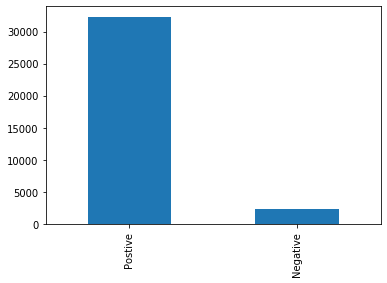

In [34]:
df_classify = df_reviews[df_reviews["reviews.rating"].notnull()]
df_classify["sentiment"] = df_classify["reviews.rating"] >= 4
df_classify["sentiment"] = df_classify["sentiment"].replace([True , False] , ["Postive" , "Negative"])

# Lets count positive and negative review
df_classify["sentiment"].value_counts().plot.bar()

In [37]:
df_reviews=pd.DataFrame(df3.groupby('reviews.rating').size().sort_values(ascending=False).rename('No of Users').reset_index())
df_reviews.head()

,reviews.rating,No of Users
0,5.0,23775
1,4.0,8541
2,3.0,1499
3,1.0,410
4,2.0,402


In [41]:
import pandas as pd
add = path
reviews = pd.read_csv(add,low_memory=False)
reviews.columns = ['id', 'name', 'asins', 'brand', 'categories', 'keys', 'manufacturer','date', 'dateAdded', 'dateSeen',
       'didPurchase', 'doRecommend', 'id','numHelpful', 'rating', 'sourceURLs','text', 'title', 'userCity',
       'userProvince', 'username']

In [42]:
reviews.nunique()

id                 42
name               48
asins              41
brand               6
categories         41
keys               42
manufacturer        2
date             1078
dateAdded        1941
dateSeen         3911
didPurchase         1
doRecommend         2
id                  1
numHelpful         97
rating              5
sourceURLs      11929
text            34659
title           19767
userCity            0
userProvince        0
username        26789
dtype: int64

In [43]:
reviews.isnull().sum()

id                  0
name             6760
asins               2
brand               0
categories          0
keys                0
manufacturer        0
date               39
dateAdded       10621
dateSeen            0
didPurchase     34659
doRecommend       594
id              34659
numHelpful        529
rating             33
sourceURLs          0
text                1
title               5
userCity        34660
userProvince    34660
username            2
dtype: int64

In [44]:
reviews.drop(labels=['didPurchase','id','userCity','userProvince'],axis=1,inplace=True)

In [45]:
reviews.isnull().sum()

name             6760
asins               2
brand               0
categories          0
keys                0
manufacturer        0
date               39
dateAdded       10621
dateSeen            0
doRecommend       594
numHelpful        529
rating             33
sourceURLs          0
text                1
title               5
username            2
dtype: int64

*** Rating distribution ***
5.0    23775
4.0     8541
3.0     1499
1.0      410
2.0      402
Name: rating, dtype: int64


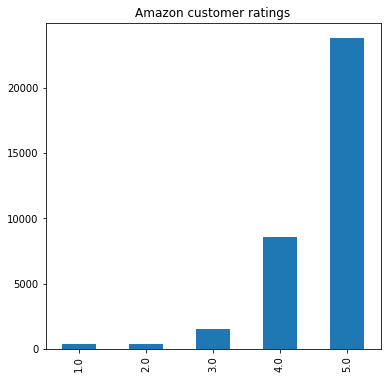

In [46]:
from matplotlib import pyplot
%matplotlib inline

star = reviews.rating.value_counts()
print("*** Rating distribution ***")
print(star)
star.sort_index(inplace=True)
star.plot(kind='bar',title='Amazon customer ratings',figsize=(6,6),style='Solarize_Light2')


In [47]:
NPS_score = round (100*((star.loc[5])-sum(star.loc[1:3]))/sum(star.loc[:]),2)
print (" NPS score of Amazon is : "  + str(NPS_score))

 NPS score of Amazon is : 61.99


In [48]:
kindle = reviews[reviews.name=='Amazon Kindle Paperwhite - eBook reader - 4 GB - 6 monochrome Paperwhite - touchscreen - Wi-Fi - black,,,']

In [49]:
kindle.isnull().sum()

name            0
asins           0
brand           0
categories      0
keys            0
manufacturer    0
date            0
dateAdded       0
dateSeen        0
doRecommend     0
numHelpful      0
rating          0
sourceURLs      0
text            0
title           0
username        0
dtype: int64

 NPS score of Kindle is : 77.08


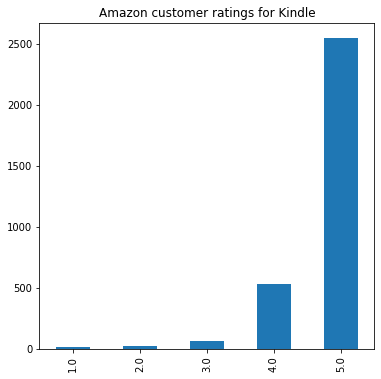

In [50]:
kindle_s = kindle.rating.value_counts()
kindle_s.sort_index(inplace=True)

Kindle_NPS_score = round (100*(kindle_s[5]-sum(kindle_s[1:3]))/sum(kindle_s),2)
print (" NPS score of Kindle is : "  + str(Kindle_NPS_score))
#better NPS than overall amazon
kindle_s.plot(kind='bar',title='Amazon customer ratings for Kindle',figsize=(6,6),style='Solarize_Light2')

In [51]:
kindle.doRecommend.value_counts()

True     3111
False      65
Name: doRecommend, dtype: int64

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001BFEC78D5C8>,
      dtype=object)

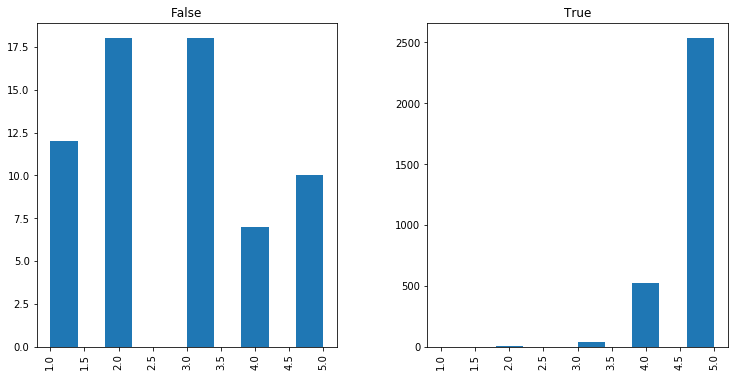

In [52]:
kindle.rating.hist(by=kindle.doRecommend,figsize=(12,6))